## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Libraries</p>

In [14]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

sys.path.append('../src/features')
from build_features import ZirconsDataProcessor

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Load Data</p>

In [6]:
df = pd.read_excel('../data/raw/diamonds.xlsx')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Feature Engineering</p>

>### New Features Explanation
>
>1. Volume (`volume`): Represents the calculated volume of the cubic zirconia stone based on its dimensions (`x`, `y`, and `z`). This volume metric provides insight into the spatial extent of the stone, which could be indicative of its physical size and overall presence.
>
>2. Density (`density`): Feature is derived from the carat weight of the stone (`carat`) and its calculated volume. This metric helps to quantify the mass-to-volume ratio of the stone. Density might be relevant in identifying denser or less dense stones, which could potentially relate to their material composition.
>
>3. Depth per Volume (`depth_per_volume`): Expresses the depth (`depth`) of the stone in relation to its calculated volume. This ratio offers a measure of how deep the stone is relative to its overall size. It could provide insights into the stone's proportions and whether its depth is proportional to its volume.
>
>4. Depth per Density (`depth_per_density`): Signifies the depth (`depth`) of the stone relative to its calculated density. This ratio gives an indication of how the stone's depth compares to its density, which might help identify cases where the depth is not aligned with the expected density.
>
>5. Depth per Table (`depth_per_table`): Reflects the depth (`depth`) of the stone in relation to its table width (`table`). This ratio aids in understanding whether the stone's depth is balanced with its table width, which could influence its visual appearance and proportions.
>
>6. Ratio of Length to Width (`ratio_xy`), Ratio of Length to Height (`ratio_xz`), Ratio of Width to Height (`ratio_yz`): These three features represent different ratios between the dimensions of the stone (`x`, `y`, and `z`). The `ratio_xy` gives insight into the stone's overall shape, while the `ratio_xz` and `ratio_yz` ratios provide information about how the dimensions are distributed along the height axis. These ratios could be useful for understanding the stone's geometric attributes and potential aesthetic aspects.



Add new features

In [25]:
processor = ZirconsDataProcessor(df)
data, price = processor.data_processor()

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume,density,depth_per_volume,depth_per_density,depth_per_table,ratio_xy,ratio_xz,ratio_yz
0,0.23,2.0,1.0,3.0,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,38.202030,0.001204,1.609862,51032.073427,1.118182,0.992462,1.625514,1.637860
1,0.21,3.0,1.0,2.0,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,34.505856,0.001217,1.733039,49089.437512,0.980328,1.013021,1.683983,1.662338
2,0.23,1.0,1.0,4.0,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,38.076885,0.001208,1.494345,47060.497743,0.875385,0.995086,1.753247,1.761905
3,0.29,3.0,5.0,5.0,0.454133,0.242928,-1.364971,-1.317305,-1.287720,46.724580,0.001241,1.335485,50228.740303,1.075862,0.992908,1.596958,1.608365
4,0.31,1.0,6.0,3.0,1.082358,0.242928,-1.240167,-1.212238,-1.117674,51.917250,0.001194,1.219248,52961.489893,1.091379,0.997701,1.578182,1.581818


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2898ee; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #2898ee">Correlations</p>

Calculate the correlation matrix and visualize a heatmap.

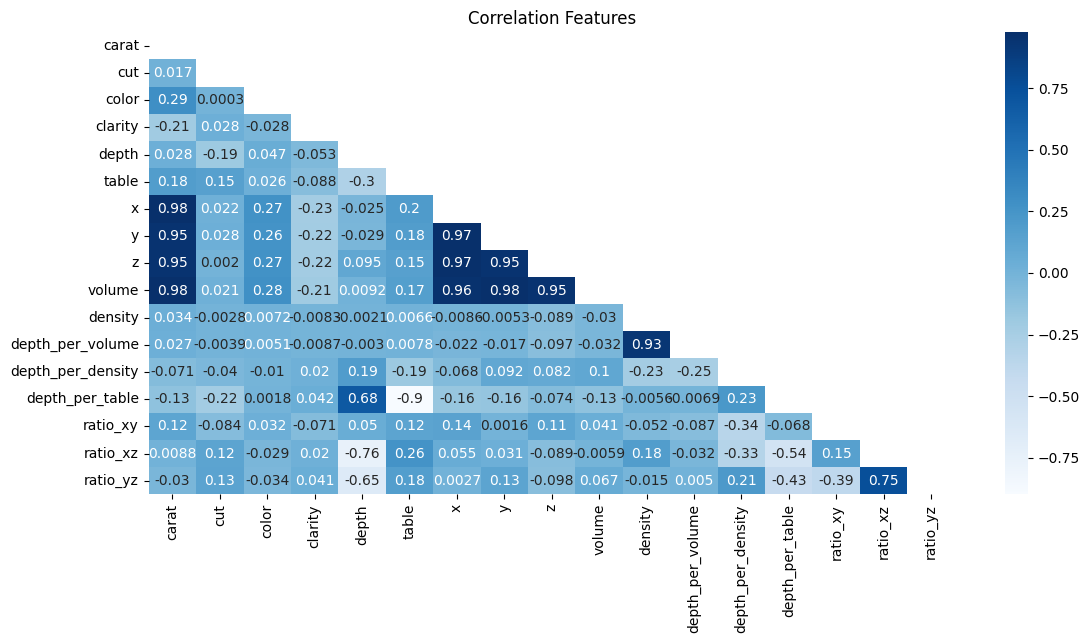

In [22]:
# Select numeric columns from the dataframe
numeric_columns = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a figure and plot the heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', mask=mask)
plt.title('Correlation Features')
plt.show()

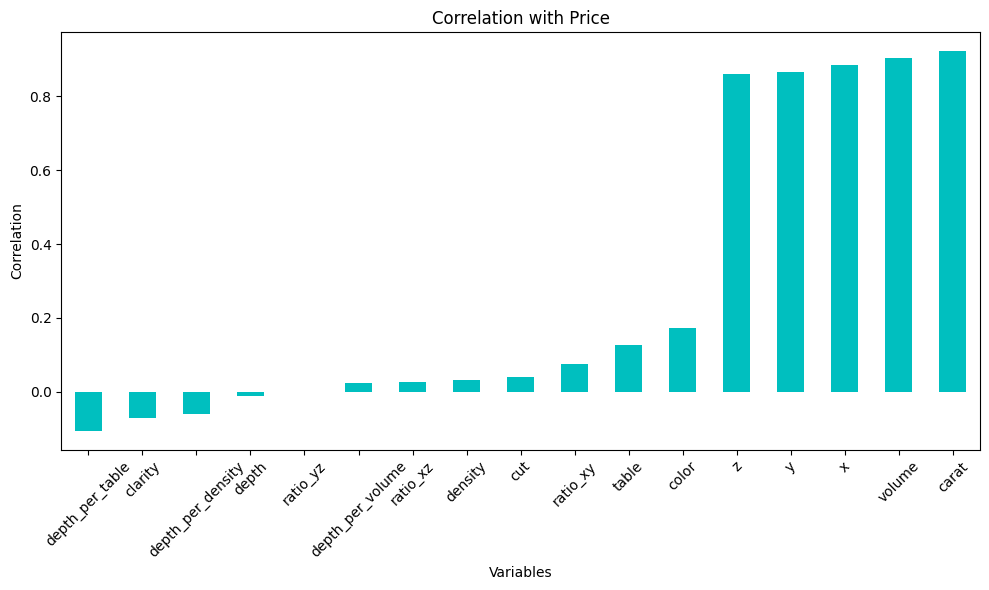

In [30]:
data['price'] = price
correlations = data.corr()['price']

plt.figure(figsize=(10, 6))
correlations.drop('price').sort_values().plot(kind='bar', color='c')
plt.title('Correlation with Price')
plt.ylabel('Correlation')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


These newly created features introduce additional dimensions of information to the dataset, potentially enriching the insights that can be derived from the data. By incorporating these metrics, you can explore different aspects of the cubic zirconia stones beyond their basic characteristics.